## Problem Statement

### Analytics in Retail:
In today's competitive retail market, optimizing service business processes to meet customer expectations is crucial. 

Effective data management is key to balancing customer satisfaction and profitability. Retailers use customer data to gauge success, employing metrics like conversion rates, average order value, recency of purchase, and total spending to understand customer behavior. 

Customer intelligence involves transforming raw transactional and behavioral data into actionable insights, predicting future trends, and improving decision-making. 

This practice is essential for large retailers, who utilize data analytics to track emerging products, forecast sales, optimize product placements and enhance promotional strategies.

### About the Data: 
A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.

#### Data Schema
There are three datasets (Customer, Transaction, Product Hierarchy):

Customer: Customer information including demographics

Transaction: Transaction of customers

Product Hierarchy: Product information


## Setup and Initialisation

In [1]:
# Import essential data analysis and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Input data files are available in the read-only "../input/" directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/retail-case-study-data/prod_cat_info.csv
/kaggle/input/retail-case-study-data/Customer.csv
/kaggle/input/retail-case-study-data/Transactions.csv


In [3]:
# Read the datasets of the Retail Case Study
customer_df = pd.read_csv("/kaggle/input/retail-case-study-data/Customer.csv")
product_df= pd.read_csv("/kaggle/input/retail-case-study-data/prod_cat_info.csv")
transaction_df = pd.read_csv("/kaggle/input/retail-case-study-data/Transactions.csv")

## Customer Dataset Overview

In [4]:
# Preview the first few rows of the customer data
customer_df.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
# Retrieve the dimensions (rows and columns) of the customer data
customer_df.shape

(5647, 4)

In [6]:
# List the column names of the customer data
customer_df.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [7]:
# Generate summary statistics for the customer data 
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_Id,5647.0,271037.281034,2451.261711,266783.0,268912.0,271028.0,273180.0,275265.0
city_code,5645.0,5.472631,2.859918,1.0,3.0,5.0,8.0,10.0


In [8]:
# Display detailed information about the customer data, including data types 
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


## Identify Null and Duplicates in Customer Data 

In [9]:
# Calculate the percentage of null values in the customer data
customer_df.isnull().sum()/len(customer_df) * 100

customer_Id    0.000000
DOB            0.000000
Gender         0.035417
city_code      0.035417
dtype: float64

In [10]:
# Retrieve the rows in the customer data that contain at least one null value
null_rows= customer_df[customer_df.isnull().any(axis=1)]
null_rows

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [11]:
# Remove rows with any null values from the customer data and display the new dimensions
customer_df.dropna(axis=0,inplace=True)
customer_df.shape

(5643, 4)

In [12]:
# Determine the number of duplicate rows in the customer data
customer_df.duplicated().sum()

0

## Exploratory Data Analysis of the Customer Data

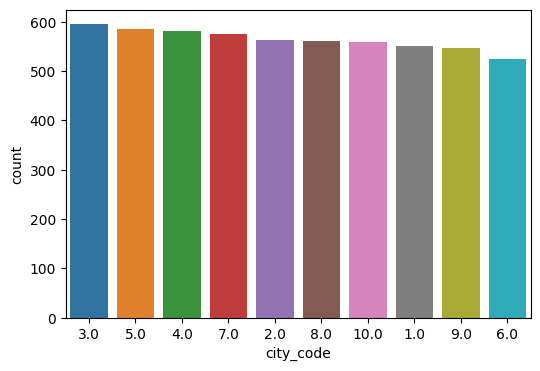

In [13]:
# Identify the number of customers from each city
city_counts = customer_df['city_code'].value_counts()
# Create the count plot and sort it in descending order
plt.figure(figsize=(6,4))
sns.countplot(data = customer_df,x= 'city_code',order=city_counts.index)
plt.show()

#### Thus,the plot shows that city code 3 has the highest number of customers.

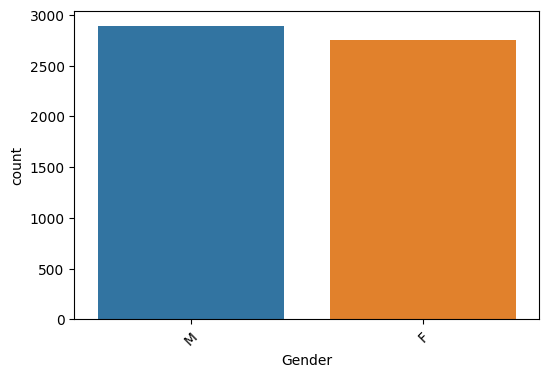

In [14]:
# Analyze the distribution of customers by gender
plt.figure(figsize=(6,4))
sns.countplot(data = customer_df,x= 'Gender')
plt.xticks(rotation=45)
plt.show()

#### The data shows a higher number of male customers compared to female customers

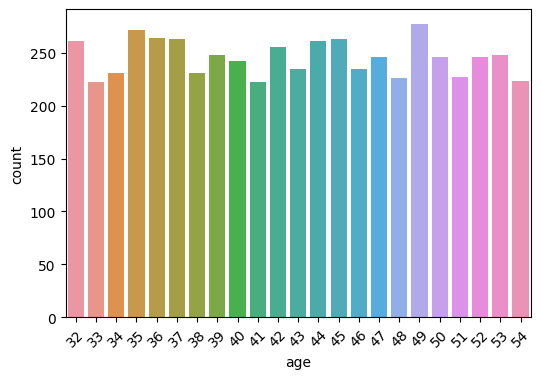

In [15]:
# Convert the DOB (Date of Birth) feature to a datetime data type
customer_df['DOB_formatted'] = pd.to_datetime(customer_df['DOB'],format="%d-%m-%Y")
customer_df['age'] = (datetime.date.today().year - customer_df['DOB_formatted'].dt.year) 
# Generate a bar chart to visualize the age distribution of customers
plt.figure(figsize=(6,4))
sns.countplot(data=customer_df, x='age')
plt.xticks(rotation=45)
plt.show()

#### The age of the customers fall within the range of 32 to 54 years.

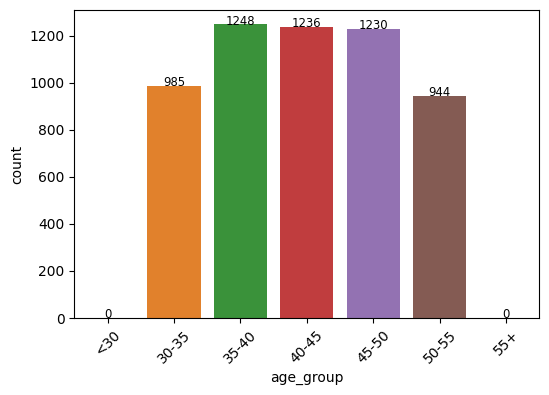

In [16]:
# Categorize customers into age groups and visualize the distribution using a bar chart
age_bins = [0,30,35,40,45,50,55,100]
age_labels = ['<30', '30-35', '35-40', '40-45', '45-50', '50-55', '55+']
customer_df['age_group'] = pd.cut(customer_df['age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(6,4))
sns.countplot(data = customer_df,x= 'age_group')
# Annotate the values of the bars
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',fontsize='small')
plt.xticks(rotation=45)
plt.show()

#### The 35-40 age group has the highest customers, however it is not significantly different from the 40-50 year old age brackets.

## Product Dataset Overview

In [17]:
# Preview the first few rows of the product data
product_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [18]:
# List the column names of the product data
product_df.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [19]:
# Retrieve the dimensions (rows and columns) of the product data
product_df.shape

(23, 4)

In [20]:
# Display detailed information about the products data, including data types 
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [21]:
# Generate summary statistics for the product data 
product_df.describe(include='O').T

,count,unique,top,freq
prod_cat,23,6,Books,6
prod_subcat,23,18,Mens,3


In [22]:
# Calculate the null values in the product data
product_df.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [23]:
# Determine the number of duplicate rows in the products data
product_df.duplicated().sum()

0

#### No null and Duplicates found in the Product Data

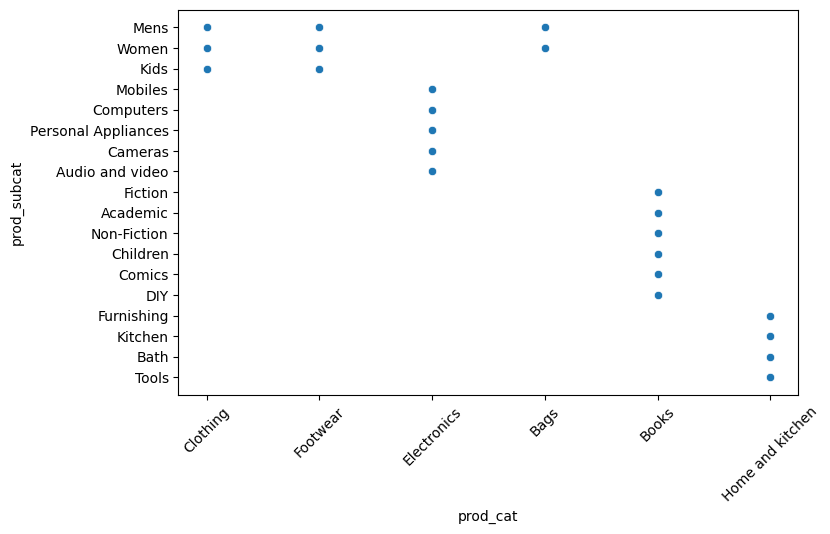

In [24]:
# Generate a scatter plot to explore the product subcategories within each category
plt.figure(figsize=(8,5))
sns.scatterplot(data = product_df,y='prod_subcat',x= 'prod_cat')
plt.xticks(rotation=45)
plt.show()

## Transaction Dataset Overview

In [25]:
# Preview the first few rows of the transaction data
transaction_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [26]:
# Retrieve the dimensions (rows and columns) of the transaction data
transaction_df.shape

(23053, 10)

In [27]:
# List the column names of the transaction data
transaction_df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [28]:
# Display detailed information about the transaction data, including data types
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [29]:
# Generate summary statistics for the transaction data
transaction_df.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [30]:
# Calculate the percentage of null values in the transaction data
transaction_df.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [31]:
# Check for duplicates
num_duplicates = transaction_df.duplicated().sum()
num_duplicates

13

In [32]:
# Remove the duplicate rows from the transaction data and display the new dimensions
transaction_df.drop_duplicates(inplace=True)
transaction_df.shape

(23040, 10)

## EDA on Transaction Dataset

In [33]:
# Merge transaction and customer data and display the first few rows
merged_df = pd.merge(left = transaction_df, right = customer_df, left_on = 'cust_id', right_on = 'customer_Id').drop('cust_id', axis =1)
merged_df.head()

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,DOB_formatted,age,age_group
0,80712190438,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,1981-09-26,43,40-45
1,29258453508,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,1973-05-11,51,50-55
2,51750724947,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,1992-07-27,32,30-35
3,93274880719,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,1981-06-08,43,40-45
4,51750724947,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,1992-07-27,32,30-35


In [34]:
#Further merge the merged transaction-customer data with product data and drop redundant columns
final_merged_df = pd.merge(merged_df, product_df, left_on = ('prod_subcat_code', "prod_cat_code"), right_on = ('prod_sub_cat_code', "prod_cat_code")).drop('prod_sub_cat_code', axis =1)
final_merged_df.head()

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,DOB_formatted,age,age_group,prod_cat,prod_subcat
0,80712190438,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,1981-09-26,43,40-45,Clothing,Women
1,29258453508,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,1973-05-11,51,50-55,Electronics,Computers
2,51750724947,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,1992-07-27,32,30-35,Books,DIY
3,93274880719,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,1981-06-08,43,40-45,Home and kitchen,Bath
4,51750724947,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,1992-07-27,32,30-35,Books,DIY


In [35]:
# Analyze the number of purchases by product category and sub-category
purchase_counts = final_merged_df.groupby(['prod_cat', 'prod_subcat']).size().reset_index(name='purchase_count')
purchase_counts = purchase_counts.sort_values(by='purchase_count',ascending=False)
print(purchase_counts)

            prod_cat          prod_subcat  purchase_count
22  Home and kitchen                Tools            1061
18          Footwear                Women            1047
6              Books              Fiction            1042
21  Home and kitchen              Kitchen            1036
3              Books             Children            1034
14       Electronics              Mobiles            1030
4              Books               Comics            1030
19  Home and kitchen                 Bath            1020
16          Footwear                 Kids            1008
20  Home and kitchen           Furnishing            1006
10          Clothing                Women            1003
0               Bags                 Mens            1002
7              Books          Non-Fiction            1001
1               Bags                Women             994
5              Books                  DIY             988
8           Clothing                 Kids             987
12       Elect

#### Thus the Subcategory "Tools" under the Home and Kitchen has more number of transactions while the subcategory "Mens"  under the Footwear has the least number of transactions

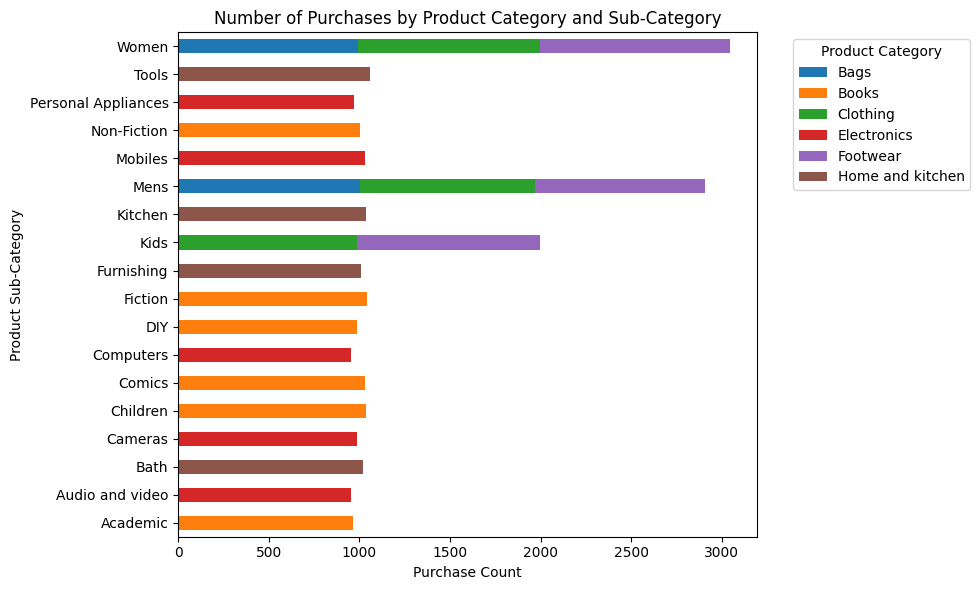

In [36]:
# Pivot the data for easier plotting
pivot_df = purchase_counts.pivot(index='prod_subcat', columns='prod_cat', values='purchase_count').fillna(0)

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Number of Purchases by Product Category and Sub-Category')
plt.ylabel('Product Sub-Category')
plt.xlabel('Purchase Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

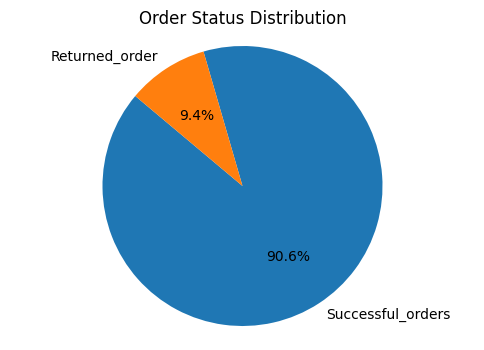

In [37]:
# Identify the cancelled orders
final_merged_df['Returned'] = (final_merged_df['total_amt'] < 0).astype(int)
returned_orders = final_merged_df['Returned'].value_counts()

# Create labels for the pie chart
labels = ['Successful_orders', 'Returned_order']

# Plot pie chart for visualizing the same
plt.figure(figsize=(6,4))
plt.pie(returned_orders.values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Order Status Distribution')
plt.show()

#### From the above plot we can infer that returns contribute ten percent of the overall transactions

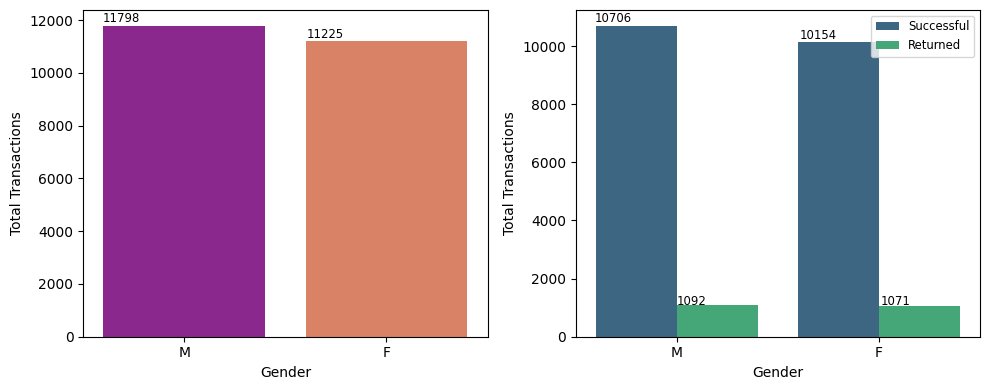

In [38]:
# Subplot 1: Visualize the total number of transactions by customer gender
# Subplot 2: Compare the number of successful and cancelled transactions by customer gender

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='Gender',ax=axes[0],palette= "plasma")
axes[0].set_ylabel('Total Transactions')
# Add labels for the first countplot
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='Gender',hue='Returned', ax=axes[1],palette='viridis')
axes[1].set_ylabel('Total Transactions')
# Add labels for the second countplot
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')
# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### The transaction volume is higher among male customers than female customers.

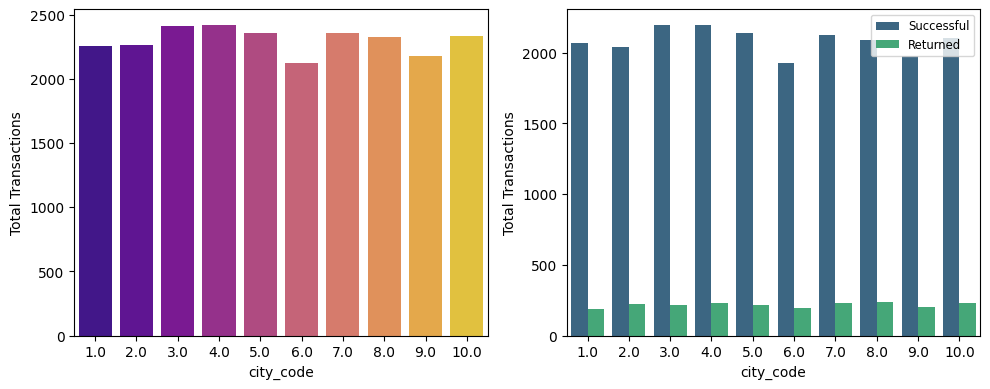

In [39]:
# Subplot 1: Visualize the total number of transactions by customer's city
# Subplot 2: Compare the number of successful and cancelled transactions by customer's city

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='city_code',ax=axes[0],palette= "plasma")
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='city_code',hue='Returned', ax=axes[1],palette= "viridis")
axes[1].set_ylabel('Total Transactions')

# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

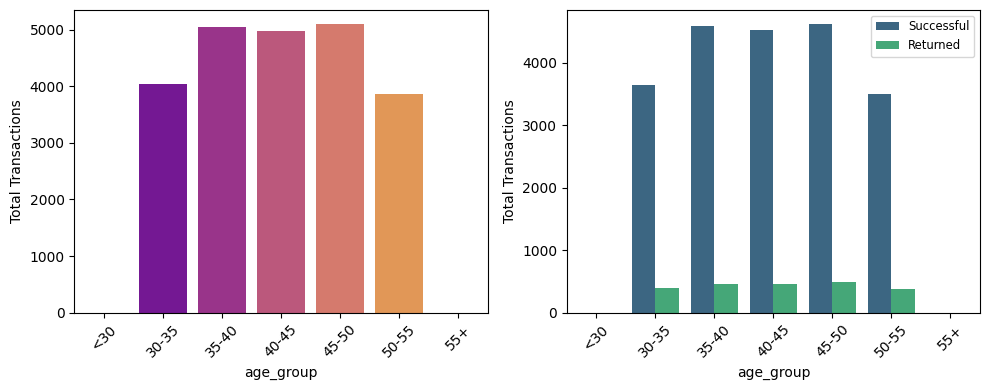

In [40]:
# Subplot 1: Visualize the total number of transactions by customer's age category
# Subplot 2: Compare the number of successful and cancelled transactions by customer's age category

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='age_group',ax=axes[0],palette='plasma')
# Rotate the x-axis labels on the first subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='age_group',hue='Returned', ax=axes[1],palette='viridis')
plt.xticks(rotation=45)
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### Transactions are most prevalent among customers between the ages of 30 and 50.

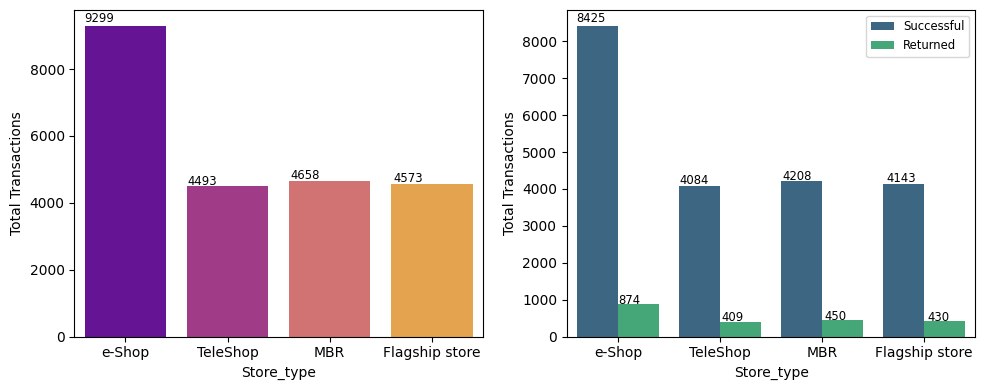

In [41]:
# Subplot 1: Visualize the total number of transactions happened in different store types
# Subplot 2: Compare the number of successful and cancelled transactions happened in different store types

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='Store_type',ax=axes[0],palette='plasma')
axes[0].set_ylabel('Total Transactions')
# Add labels for the first countplot
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='Store_type',hue='Returned', ax=axes[1],palette='viridis')

# Add labels for the second countplot
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### The visual representation shows that the e-shop channel dominates in terms of transaction volume, while the Teleshop channel accounts for a smaller share of the total transactions.

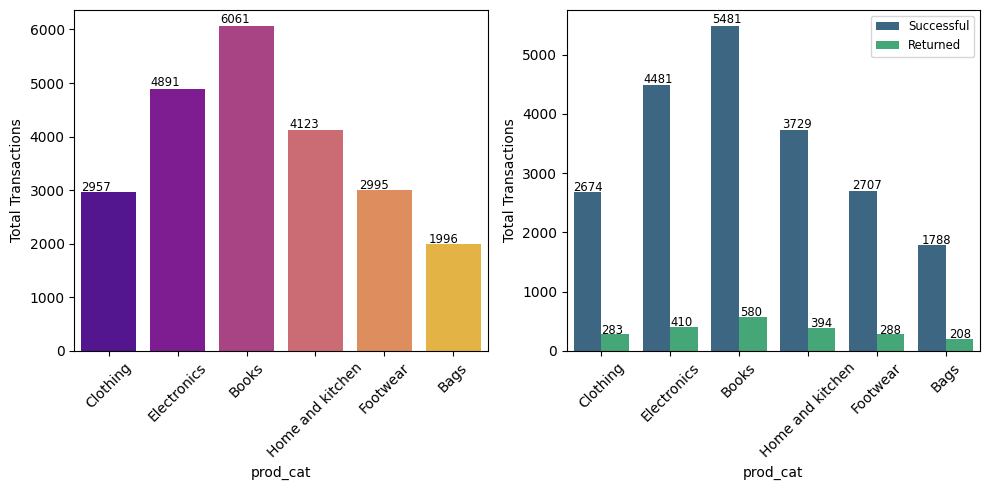

In [42]:
# Subplot 1: Visualize the total number of transactions happened in different product categories
# Subplot 2: Compare the number of successful and cancelled transactions happened in different product categories

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data = final_merged_df,x='prod_cat',ax=axes[0],palette='plasma')
# Add labels for the first countplot
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
# Rotate x-ticks for the first subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='prod_cat',hue='Returned', ax=axes[1],palette='viridis')
# Add labels for the second countplot
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
# Rotate x-ticks for the second subplot
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### Transaction activity is most prominent in the Books product category, in contrast to the Bags category, which has a comparatively lower transaction volume.

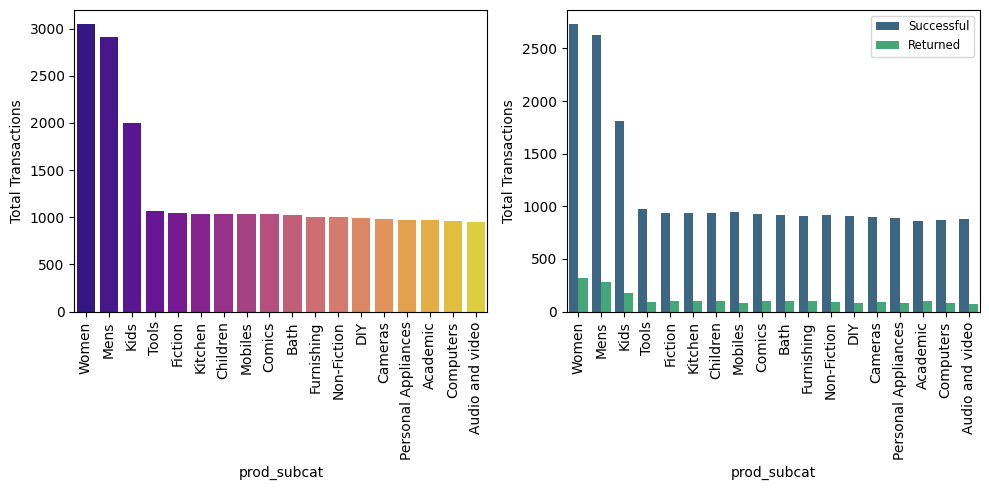

In [43]:
# Subplot 1: Visualize the total number of transactions happened in different product subcategories
# Subplot 2: Compare the number of successful and cancelled transactions happened in different product subcategories

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Sort x-ticks in descending order for the first subplot
sorted_prod_subcat = final_merged_df['prod_subcat'].value_counts().index

# Plot the first countplot on the first axis
sns.countplot(data=final_merged_df, x='prod_subcat',order=sorted_prod_subcat, ax=axes[0],palette='plasma')
axes[0].set_xticklabels(sorted_prod_subcat, rotation=90)
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='prod_subcat',order=sorted_prod_subcat, hue='Returned', ax=axes[1],palette='viridis')
# Sort x-ticks in descending order for the second subplot
axes[1].set_xticklabels(sorted_prod_subcat, rotation=90)
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [44]:
# Convert the Transaction Date feature to a datetime data type and derive year,month and weekday_name

final_merged_df['tran_date_formatted'] = pd.to_datetime(final_merged_df['tran_date'],format= "mixed")
final_merged_df['Month'] = final_merged_df['tran_date_formatted'].dt.month
final_merged_df['Year'] = final_merged_df['tran_date_formatted'].dt.year
final_merged_df['weekday_name'] = final_merged_df['tran_date_formatted'].dt.day_name()
min_date = final_merged_df['tran_date_formatted'].min()
max_date = final_merged_df['tran_date_formatted'].max()
print(min_date)
print(max_date)

2011-01-02 00:00:00
2014-12-02 00:00:00


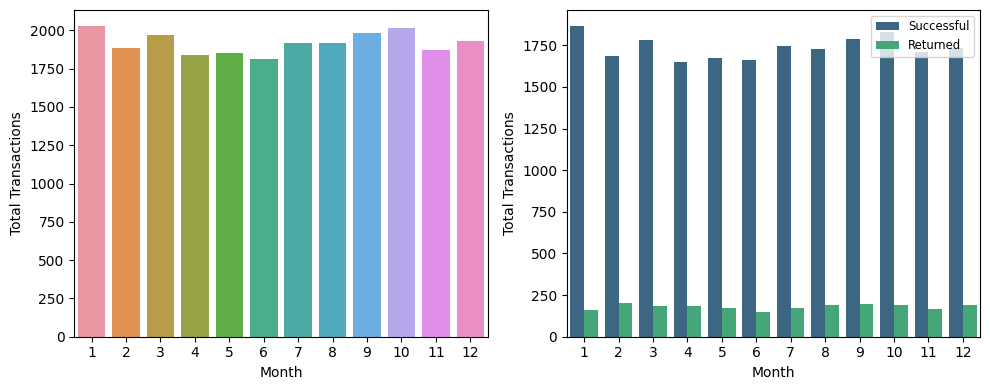

In [45]:
# Subplot 1: Visualize the total number of transactions happened in different months of the year
# Subplot 2: Compare the number of successful and cancelled transactions happened in different months of the year

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='Month',ax=axes[0])
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='Month',hue='Returned', ax=axes[1],palette='viridis')
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### While the transaction volume remains relatively consistent across months, January emerges as the month with the highest number of transactions.

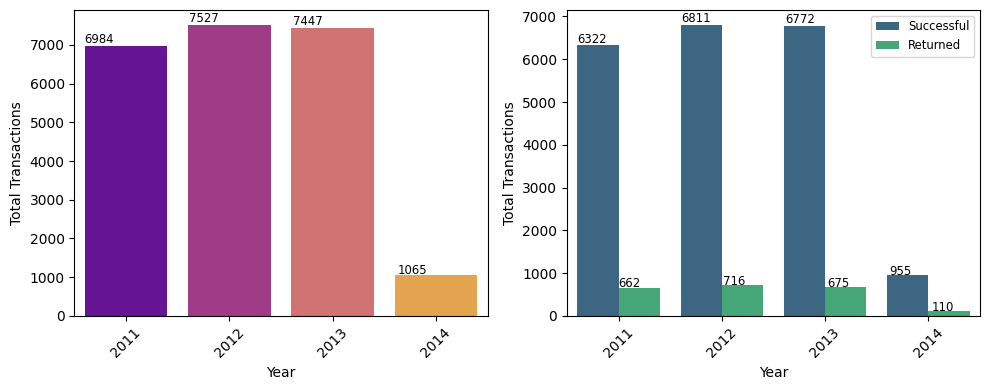

In [46]:
# Subplot 1: Visualize the total number of transactions happened in different year
# Subplot 2: Compare the number of successful and returned transactions happened in different year

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data = final_merged_df,x='Year',ax=axes[0],palette= "plasma")
# Add labels for the first countplot
for p in axes[0].patches:
    axes[0].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Total Transactions')

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='Year',hue='Returned', ax=axes[1],palette= "viridis")

# Add labels for the second countplot
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### While 2012 stands out with the greatest transaction volume, 2014 lags behind with a significantly lower contribution to the overall transaction count.

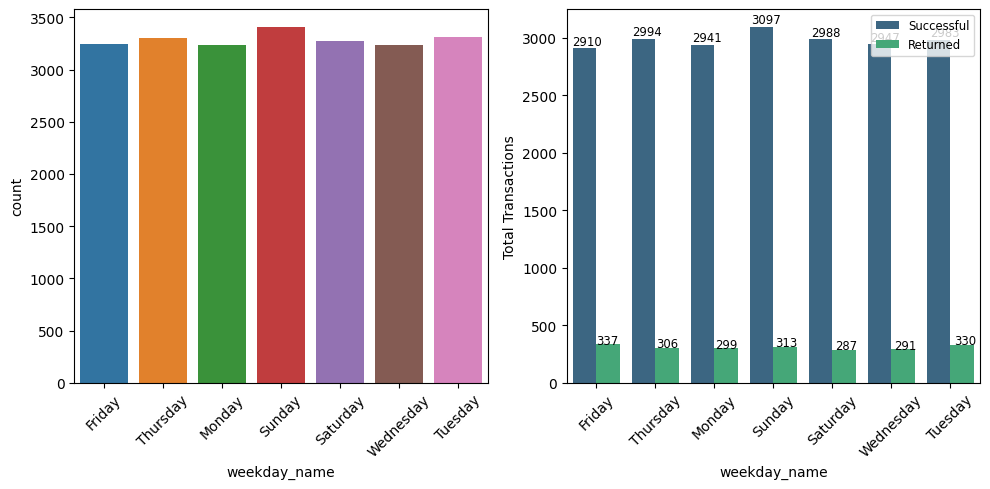

In [47]:
# Subplot 1: Visualize the total number of transactions happened in different days of the week
# Subplot 2: Compare the number of successful and returned transactions happened in different days of the week

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data = final_merged_df,x='weekday_name',ax=axes[0])
# Add labels for the first countplot
for p in axes[0].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second countplot on the second axis
sns.countplot(data=final_merged_df, x='weekday_name',hue='Returned', ax=axes[1],palette= "viridis")
for p in axes[1].patches:
    axes[1].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01),fontsize='small')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Total Transactions')
# Add legend to the second subplot
legend_labels = ['Successful', 'Returned']
legend = axes[1].legend(labels=legend_labels, loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

#### Despite the weekday transaction figures being comparable, Sunday stands out as the day with the greatest transaction activity.

In [48]:
#Create a new dataframe for storing the successful and returned orders
successful_orders = final_merged_df[final_merged_df['Returned'] == 0]
returned_orders = final_merged_df[final_merged_df['Returned'] == 1]
print(successful_orders.shape)
print(returned_orders.shape)

(20860, 23)
(2163, 23)


## Data Exploration for Revenue Insights

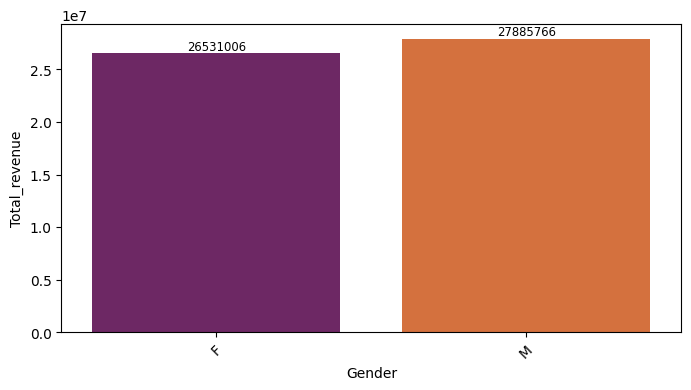

In [49]:
# Analyze the total revenue of the successful orders by customer gender

total_sales_Gender = successful_orders.groupby('Gender')['total_amt'].sum()
total_sales_Gender

plt.figure(figsize=(8,4))
sns.barplot(x = total_sales_Gender.index,y=total_sales_Gender.values,palette= "inferno")
# Add value labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0,5), 
                      textcoords='offset points',
                      fontsize='small')
plt.ylabel("Total_revenue")
plt.xticks(rotation=45)
plt.show()

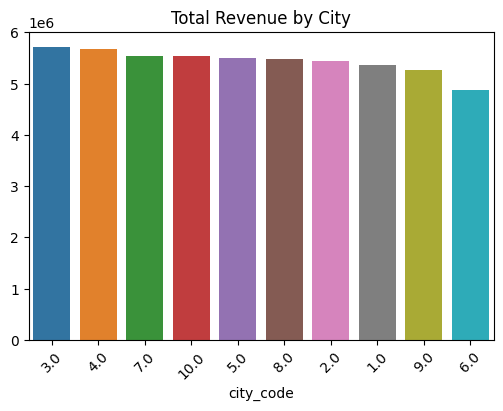

In [50]:
# Calculate total revenue generated by city
total_sales_city = successful_orders.groupby('city_code')['total_amt'].sum()
# Sort the total sales by city in descending order
total_sales_city = total_sales_city.sort_values(ascending=False)
# Create a bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=total_sales_city.index, y=total_sales_city.values,order=total_sales_city.index)
# Rotate x-ticks for better readability
plt.xticks(rotation=45)
# Add chart title
plt.title('Total Revenue by City')

# Display the chart
plt.show()


#### City codes 3 and 4 emerged as the top revenue generators, whereas city code 6 recorded the lowest revenue contribution.

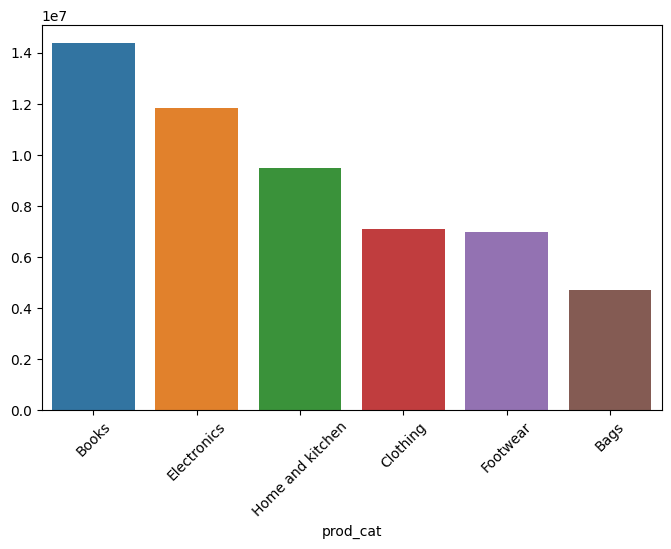

In [51]:
# Calculate total revenue generated by different product categories
total_sales_prod_subcat = successful_orders.groupby('prod_cat')['total_amt'].sum()
total_sales_prod_subcat = total_sales_prod_subcat.sort_values(ascending=False)
total_sales_prod_subcat
plt.figure(figsize=(8,5))
sns.barplot(x = total_sales_prod_subcat.index,y=total_sales_prod_subcat.values)
plt.xticks(rotation=45)
plt.show()

In [52]:
# Analyze the revenue by product category and sub-category
# Calculate total revenue generated by weekday
total_sales_subcat = successful_orders.groupby(['prod_cat', 'prod_subcat'])['total_amt'].sum().reset_index(name='revenue_subcat')
total_sales_subcat = total_sales_subcat.sort_values(by='revenue_subcat',ascending=False)
total_sales_subcat


,prod_cat,prod_subcat,revenue_subcat
14,Electronics,Mobiles,2508648.350
6,Books,Fiction,2488264.415
3,Books,Children,2471269.515
16,Footwear,Kids,2426296.015
22,Home and kitchen,Tools,2393433.315
4,Books,Comics,2393278.615
7,Books,Non-Fiction,2382429.725
10,Clothing,Women,2378355.590
8,Clothing,Kids,2377545.625
20,Home and kitchen,Furnishing,2374721.245


#### The data suggests that the Mobiles subcategory is the frontrunner in revenue generation,while the Mens Footwear category is the least performer in terms of revenue.

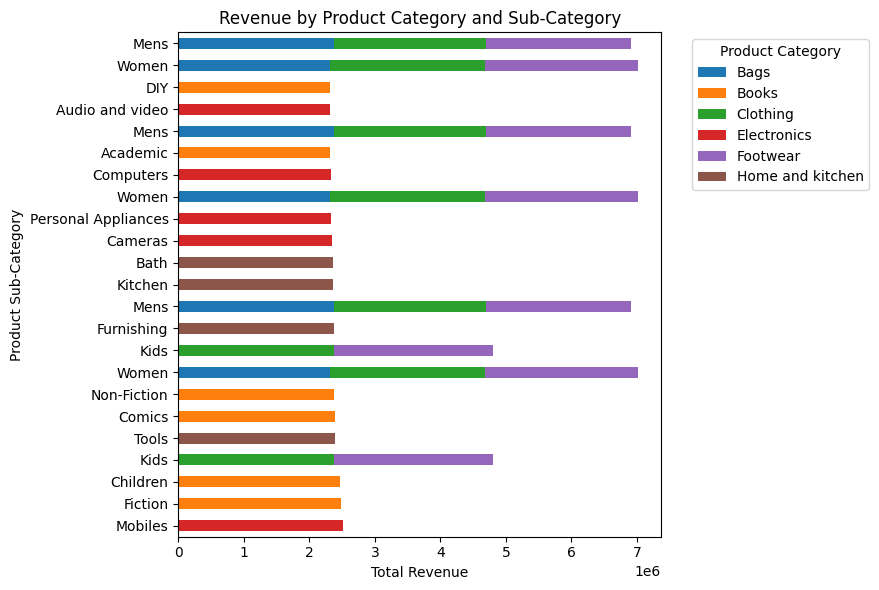

In [53]:
# Visual representation of the revenue generated by each subcategory under each product category
# Pivot the data
pivot_df = total_sales_subcat.pivot(index='prod_subcat', columns='prod_cat', values='revenue_subcat').fillna(0)

# Reorder the pivoted DataFrame index to match the sorted order
ordered_index = total_sales_subcat['prod_subcat']
pivot_df = pivot_df.reindex(ordered_index)

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(9,6))

plt.title('Revenue by Product Category and Sub-Category')
plt.ylabel('Product Sub-Category')
plt.xlabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

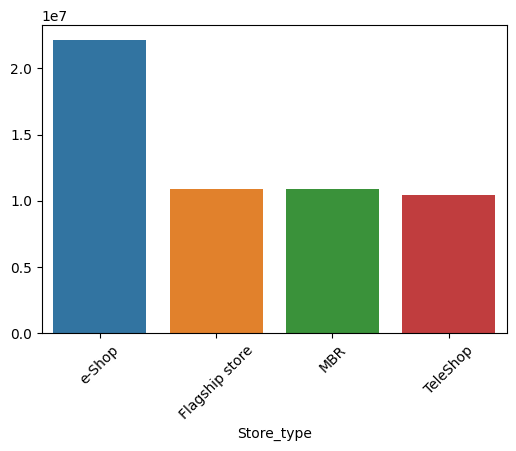

In [54]:
# Calculate total revenue generated by Store type
total_sales_storetype = successful_orders.groupby('Store_type')['total_amt'].sum()
total_sales_storetype = total_sales_storetype.sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x = total_sales_storetype.index,y=total_sales_storetype.values)
plt.xticks(rotation=45)
plt.show()

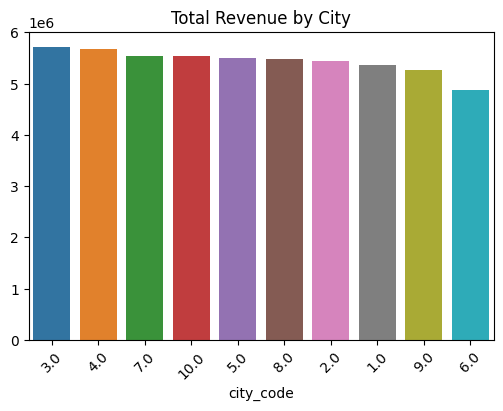

In [55]:
# Calculate total revenue generated by city
total_sales_city = successful_orders.groupby('city_code')['total_amt'].sum()
# Sort the total sales by city in descending order
total_sales_city = total_sales_city.sort_values(ascending=False)
# Create a bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=total_sales_city.index, y=total_sales_city.values,order=total_sales_city.index)
# Rotate x-ticks for better readability
plt.xticks(rotation=45)
# Add chart title
plt.title('Total Revenue by City')

# Display the chart
plt.show()


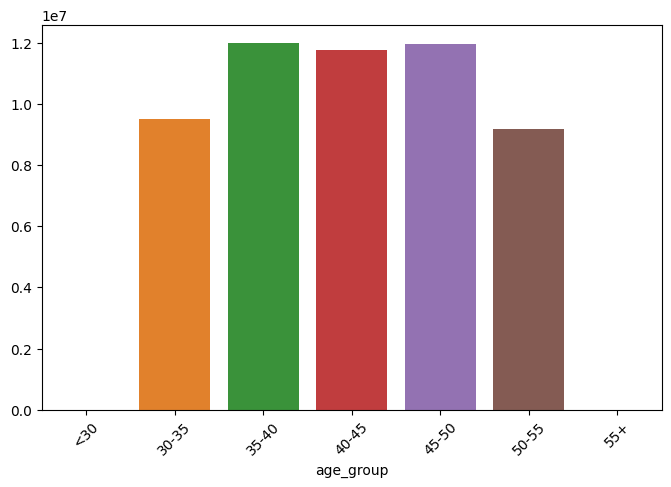

In [56]:
# Calculate total revenue generated by different age groups
total_sales_age = successful_orders.groupby('age_group')['total_amt'].sum()
total_sales_age = total_sales_age.sort_values(ascending=False)
total_sales_age
plt.figure(figsize=(8,5))
sns.barplot(x = total_sales_age.index,y=total_sales_age.values)
plt.xticks(rotation=45)
plt.show()

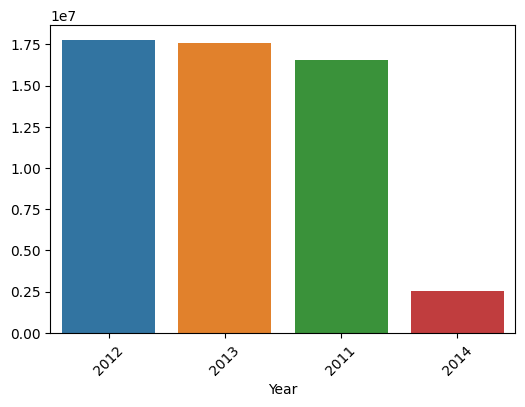

In [57]:
# Calculate total revenue generated by year
total_sales_year = successful_orders.groupby('Year')['total_amt'].sum()
total_sales_year = total_sales_year.sort_values(ascending=False)
total_sales_year
plt.figure(figsize=(6,4))
sns.barplot(x = total_sales_year.index,y=total_sales_year.values,order=total_sales_year.index)
plt.xticks(rotation=45)
plt.show()

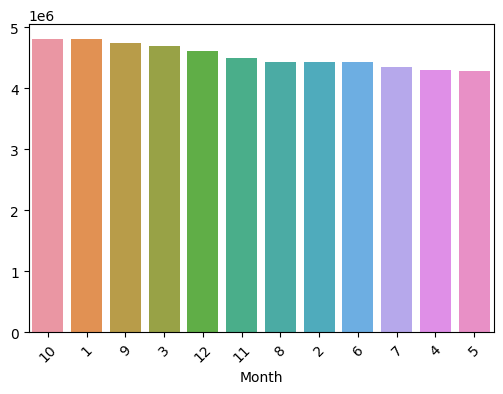

In [58]:
# Calculate total revenue generated by Store type
total_sales_month = successful_orders.groupby('Month')['total_amt'].sum()
total_sales_month = total_sales_month.sort_values(ascending=False)
total_sales_month
plt.figure(figsize=(6,4))
sns.barplot(x = total_sales_month.index,y=total_sales_month.values,order=total_sales_month.index)
plt.xticks(rotation=45)
plt.show()

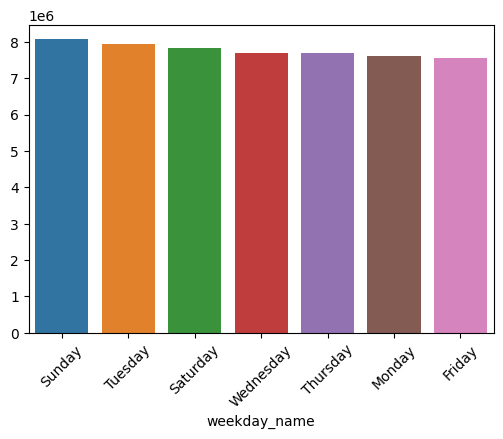

In [59]:
# Calculate total revenue generated by weekday
total_sales_weekday = successful_orders.groupby('weekday_name')['total_amt'].sum()
total_sales_weekday = total_sales_weekday.sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x = total_sales_weekday.index,y=total_sales_weekday.values)
plt.xticks(rotation=45)
plt.show()

## Conclusion
Based on the exploratory data analysis of the retail customer data, which encompasses customer, product, and transaction details, several key insights into revenue generation and customer behavior were uncovered. 
## Future Work
Moving forward, the next steps involve applying machine learning algorithms to further enhance our understanding and capabilities. 

Specifically, we aim to develop a recommender system tailored to customer preferences, leveraging their past behaviors and transaction histories to provide personalized product recommendations. 

This approach will not only improve customer satisfaction but also drive sales and optimize inventory management.






